In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from vae import VAE

import torch
from torchvision.datasets import CIFAR10
import torchvision.transforms as T
import matplotlib.pyplot as plt

In [3]:
!tree lightning_logs

lightning_logs
├── version_0
│   ├── checkpoints
│   │   └── epoch=98.ckpt
│   ├── events.out.tfevents.1598564386.beast.18931.0
│   └── hparams.yaml
└── version_1
    ├── checkpoints
    │   └── epoch=12.ckpt
    ├── events.out.tfevents.1598567253.beast.28611.0
    └── hparams.yaml

4 directories, 6 files


In [4]:
vae = VAE.load_from_checkpoint("lightning_logs/version_0/checkpoints/epoch=98.ckpt")
vae.eval();

In [5]:
ds = CIFAR10("data", train=False, transform=T.ToTensor())

In [6]:
example = 4

In [7]:
img = ds[example][0]
with torch.no_grad():
    mu = vae.encode(img.unsqueeze(0))[0]
    reconst = vae.decode(mu).squeeze()

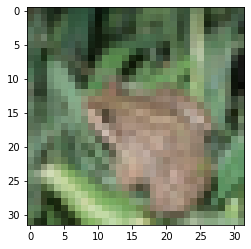

In [8]:
plt.imshow(img.permute(1, 2, 0).numpy())

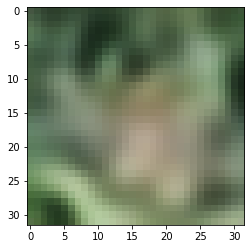

In [9]:
plt.imshow(reconst.permute(1, 2, 0).numpy())

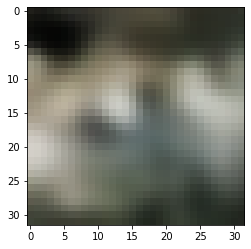

In [10]:
with torch.no_grad():
    z = torch.randn_like(mu)
    gen = vae.decode(z).squeeze()
    
plt.imshow(gen.permute(1, 2, 0).numpy())